<img src="../images/tinap.png" style="float: left; margin: 15px; height: 50px">

# Tina's Project - Ames House Sales Price Prediction

## 02. Data Preprocessing and Feature Engineering

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## Load Data

In [59]:
df_train = pd.read_csv('../data/train_cleaned.csv')
df_test = pd.read_csv('../data/test_cleaned.csv')

## Data Preview

In [60]:
df_train.shape

(2047, 87)

In [61]:
df_test.shape

(878, 86)

## Data Preprocessing

### Column Selection - Numerical Variables

In [62]:
num_cols = ['Year Remod/Add', 'has_mas_vnr', 'Garage Area', 'total_baths', 'Remod', 'Year Built',
            'Overall Qual', 'Mas Vnr Area', 'new_garage', 'new_house', 'total_sqft']

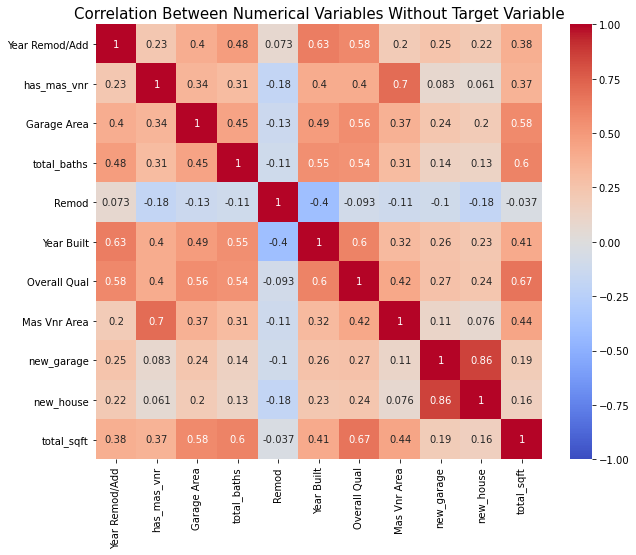

In [63]:
# Correlation x with x
plt.figure(figsize = (10,8))
sns.heatmap(df_train[num_cols].corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.title('Correlation Between Numerical Variables Without Target Variable', fontsize = 15);

### Column Selection - Categorical Variables
* **Drop columns:** According to EDA of categorical variable in `01_EDA_and_Cleaning.ipynb` file, I will remove those categorical variables with less impact on the target variable ( `SalePrice` ).
* **Transform column types:** The labels of some categorical variables have quantity relationships. 
> For example, labels in `Garage Qual` can be remarked as scores from 0 to 5, which 0 means no pool and 5 means Excellent.
>* Ex: Excellent --> 5
>* Gd: Good --> 4
>* TA: Average/Typical --> 3
>* Fa: Fair --> 2
>* Po: Poor --> 1
>* NA: No Pool --> 0

#### Drop Some of the Category Variables

In [64]:
cat_cols = df_train.select_dtypes(include = ['O']).columns.tolist()
cat_cols = list(set(cat_cols) - {'Utilities', 'Land Shape', 'Lot Config', 'Roof Style', 'Exterior 2nd', 
                'Foundation', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Misc Feature', 'Fence', 'Exter Qual',
                'Sale Type', 'Functional', 'House Style', 'Bldg Type', 'Paved Drive', 'Garage Cond', 'Bsmt Cond'})

#### Transform Some of the Categorical Variables to Numerical Variables

In [65]:
# train
df_train['Pool QC'] = df_train['Pool QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                               'Fa': 2, 'Po': 1, 'No': 0})
df_train['Garage Qual'] = df_train['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                       'Fa': 2, 'Po': 1, 'No': 0})
df_train['Fireplace Qu'] = df_train['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                         'Fa': 2, 'Po': 1, 'No': 0})
df_train['Heating QC'] = df_train['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                     'Fa': 2, 'Po': 1, 'No': 0})
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].map({'Ex': 100, 'Gd': 95, 'TA': 85, 
                                                   'Fa': 75, 'Po': 65, 'No': 0})
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 
                                                           'Mn': 2, 'No': 0})
df_train['Garage Finish'] = df_train['Garage Finish'].map({'Fin': 1, 'Unf': 0.5,
                                                           'RFn':0.8, 'No': 0})
df_train['Exter Cond'] = df_train['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                     'Fa': 2, 'Po': 1})
df_train['Condition 2'] = df_train['Condition 2'].map({'PosN': 'Pos', 'PosA': 'Pos', 'Artery': 'Other',
                   'Feedr': 'Other', 'Norm': 'Other', 'RRNn': 'Other',
                   'RRAn': 'Other', 'RRNe': 'Other', 'RRAe': 'Other'})
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [66]:
# test
df_test['Pool QC'] = df_test['Pool QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                               'Fa': 2, 'Po': 1, 'No': 0})
df_test['Garage Qual'] = df_test['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                       'Fa': 2, 'Po': 1, 'No': 0})
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                         'Fa': 2, 'Po': 1, 'No': 0})
df_test['Heating QC'] = df_test['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                     'Fa': 2, 'Po': 1, 'No': 0})
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map({'Ex': 100, 'Gd': 95, 'TA': 85, 
                                                   'Fa': 75, 'Po': 65, 'No': 0})
df_test['Bsmt Exposure'] = df_test['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 
                                                           'Mn': 2, 'No': 0})
df_test['Garage Finish'] = df_test['Garage Finish'].map({'Fin': 1, 'Unf': 0.5,
                                                           'RFn':0.8, 'No': 0})
df_test['Exter Cond'] = df_test['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                     'Fa': 2, 'Po': 1})
df_test['Condition 2'] = df_test['Condition 2'].map({'PosN': 'Pos', 'PosA': 'Pos', 'Artery': 'Other',
                   'Feedr': 'Other', 'Norm': 'Other', 'RRNn': 'Other',
                   'RRAn': 'Other', 'RRNe': 'Other', 'RRAe': 'Other'})

df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

Move transformed columns form `cat_cols` to `num_cols`.

In [67]:
cat_cols = set(cat_cols) - {'Pool QC', 'Garage Qual', 'Fireplace Qu', 'Heating QC', 'Bsmt Qual',
                            'Bsmt Exposure', 'Garage Finish', 'Exter Cond', 'Kitchen Qual'}
cat_cols = list(cat_cols)
cat_cols

['Roof Matl',
 'Alley',
 'MS Zoning',
 'Central Air',
 'Land Slope',
 'Mas Vnr Type',
 'Exterior 1st',
 'Land Contour',
 'Heating',
 'Condition 2',
 'Electrical',
 'Condition 1',
 'Lot Shape',
 'Garage Type',
 'Neighborhood',
 'Street']

In [68]:
num_cols = num_cols + ['Pool QC', 'Garage Qual', 'Fireplace Qu', 'Heating QC', 'Bsmt Qual',
                       'Bsmt Exposure', 'Garage Finish', 'Exter Cond', 'Kitchen Qual']
num_cols

['Year Remod/Add',
 'has_mas_vnr',
 'Garage Area',
 'total_baths',
 'Remod',
 'Year Built',
 'Overall Qual',
 'Mas Vnr Area',
 'new_garage',
 'new_house',
 'total_sqft',
 'Pool QC',
 'Garage Qual',
 'Fireplace Qu',
 'Heating QC',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Garage Finish',
 'Exter Cond',
 'Kitchen Qual']

### Remove Close-Related Numerical Variables

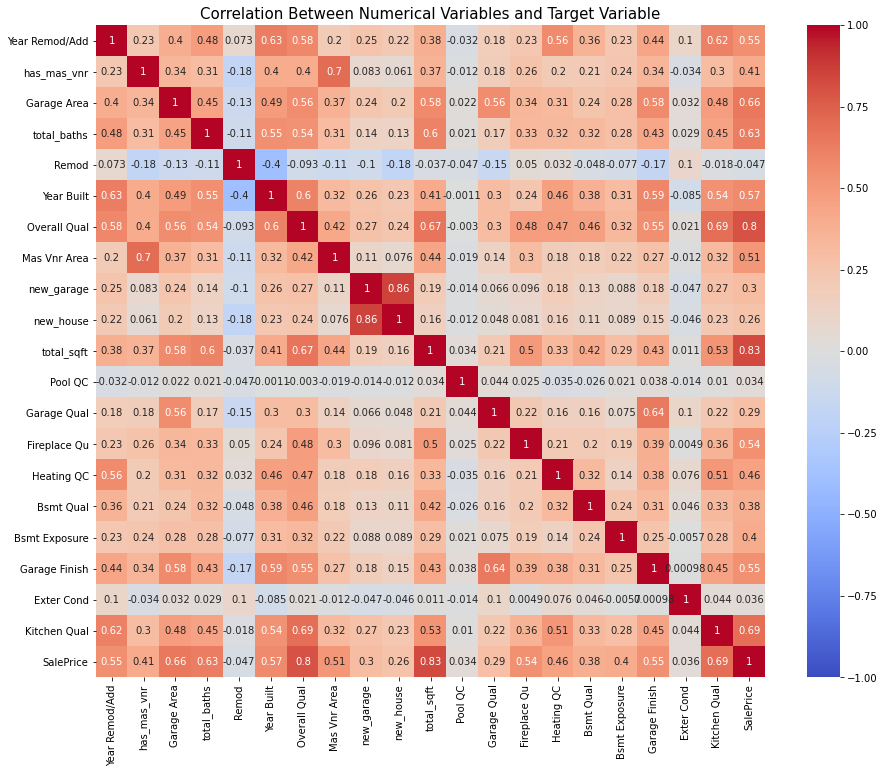

In [69]:
plt.figure(figsize = (15, 12))
rel_x = num_cols + ['SalePrice']
sns.heatmap(df_train[rel_x].corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)
plt.title('Correlation Between Numerical Variables and Target Variable', fontsize = 15);

#### Remove `new_garage`, `Year Built`, `Year Remod/Add`, and `has_mas_vnr`.

In [70]:
num_cols = list(set(num_cols) - {'new_garage', 'Year Built', 'Year Remod/Add', 'has_mas_vnr'})
num_cols

['Heating QC',
 'Pool QC',
 'new_house',
 'Garage Qual',
 'Garage Finish',
 'Bsmt Qual',
 'total_baths',
 'Mas Vnr Area',
 'Bsmt Exposure',
 'Kitchen Qual',
 'Overall Qual',
 'total_sqft',
 'Fireplace Qu',
 'Remod',
 'Exter Cond',
 'Garage Area']

### All Columns Selected

In [71]:
all_sel_cols = num_cols + cat_cols + ['Id']
len(all_sel_cols)

33

In [72]:
df_train_sel = df_train[all_sel_cols + ['SalePrice']]
df_test_sel = df_test[all_sel_cols]

In [73]:
df_train_sel.shape

(2047, 34)

In [74]:
df_test_sel.shape

(878, 33)

## Feature Engineering

### Dummy Categorical Variables

In [75]:
df_train_ready = pd.get_dummies(columns = cat_cols, 
                                data = df_train_sel, drop_first = True)
df_test_ready = pd.get_dummies(columns = cat_cols, 
                                data = df_test_sel, drop_first = True)

In [76]:
cat_not_in_test = set(df_train_ready.columns) - set(df_test_ready.columns) - {'SalePrice'}
cat_not_in_test

{'Electrical_Mix',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Heating_OthW',
 'Heating_Wall',
 'MS Zoning_C (all)',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_Membran'}

In [77]:
cat_not_in_train = set(df_test_ready.columns) - set(df_train_ready.columns)
cat_not_in_train

{'Exterior 1st_PreCast',
 'Heating_GasA',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll'}

#### Remove features that are not in both training and testing datasets.

In [78]:
df_train_ready.drop(columns = cat_not_in_test, inplace = True)
df_test_ready.drop(columns = cat_not_in_train, inplace = True)

In [79]:
df_train_ready.shape

(2047, 98)

In [80]:
df_test_ready.shape

(878, 97)

In [81]:
# Check column difference
set(df_train_ready.columns.values) - set(df_test_ready.columns.values)

{'SalePrice'}

## Output Ready Datasets
* train_ready.csv
* test_ready.csv

In [82]:
df_train_ready.to_csv('../data/train_ready.csv', index = False)
df_test_ready.to_csv('../data/test_ready.csv', index = False)

---
## Model Part 2 - X features Remove
After building the first 2 models in part 1, I come back and try to remove some of the X features I selected for model 1 to see if I can improve the model.

In [83]:
df_train_sel.drop(columns = ['Electrical', 'Exterior 1st', 'MS Zoning', 'Street',
                             'Land Slope', 'Condition 2', 'Heating', 'Central Air',
                             'Garage Finish', 'Roof Matl'], inplace = True)

df_test_sel.drop(columns = ['Electrical', 'Exterior 1st', 'MS Zoning', 'Street',
                             'Land Slope', 'Condition 2', 'Heating', 'Central Air',
                             'Garage Finish', 'Roof Matl'], inplace = True)

/Users/tinapeng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
cat_cols_2 = list(set(cat_cols) - {'Electrical', 'Exterior 1st', 'MS Zoning', 'Street',
                             'Land Slope', 'Condition 2', 'Heating', 'Central Air',
                             'Garage Finish', 'Roof Matl'})

In [85]:
df_train_ready = pd.get_dummies(columns = cat_cols_2, 
                                data = df_train_sel, drop_first = True)
df_test_ready = pd.get_dummies(columns = cat_cols_2, 
                                data = df_test_sel, drop_first = True)

cat_not_in_test = set(df_train_ready.columns) - set(df_test_ready.columns) - {'SalePrice'}
cat_not_in_train = set(df_test_ready.columns) - set(df_train_ready.columns)

df_train_ready.drop(columns = cat_not_in_test, inplace = True)
df_test_ready.drop(columns = cat_not_in_train, inplace = True)

In [86]:
df_train_ready.shape

(2047, 68)

In [87]:
df_test_ready.shape

(878, 67)

### Output New Ready Datasets for Model Part 2

In [88]:
df_train_ready.to_csv('../data/train_ready_2.csv', index = False)
df_test_ready.to_csv('../data/test_ready_2.csv', index = False)